In [1]:
import pandas as pd
import numpy as np

filename = "wine.data"
data = pd.read_csv(filename)
data.columns = ['Cultivar', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins', 'Color_intensity', 'Hue', 'OD280/OD315_of_diluted_wines', 'Proline']
data.shape
print(data)

     Cultivar  Alcohol  Malic_acid  ...   Hue  OD280/OD315_of_diluted_wines  Proline
0           1    13.20        1.78  ...  1.05                          3.40     1050
1           1    13.16        2.36  ...  1.03                          3.17     1185
2           1    14.37        1.95  ...  0.86                          3.45     1480
3           1    13.24        2.59  ...  1.04                          2.93      735
4           1    14.20        1.76  ...  1.05                          2.85     1450
..        ...      ...         ...  ...   ...                           ...      ...
172         3    13.71        5.65  ...  0.64                          1.74      740
173         3    13.40        3.91  ...  0.70                          1.56      750
174         3    13.27        4.28  ...  0.59                          1.56      835
175         3    13.17        2.59  ...  0.60                          1.62      840
176         3    14.13        4.10  ...  0.61                    

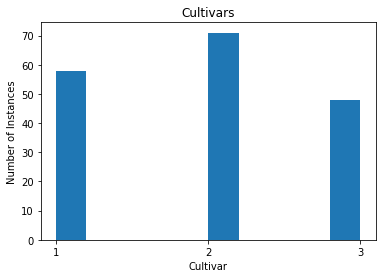

In [3]:
import matplotlib.pyplot as plt

plt.hist(data['Cultivar'])
plt.xlabel('Cultivar')
plt.xticks(np.arange(1,4,1))
plt.ylabel('Number of Instances')
plt.title('Cultivars')
plt.show()

#first lets look at our distribution/sample size of each cultivar

In [3]:
data.describe()

,Cultivar,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,1.943503,12.993672,2.339887,2.366158,19.516949,99.587571,2.292260,2.023446,0.362316,1.586949,5.054802,0.956983,2.604294,745.096045
std,0.773991,0.808808,1.119314,0.275080,3.336071,14.174018,0.626465,0.998658,0.124653,0.571545,2.324446,0.229135,0.705103,314.884046
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.210000,0.780000,1.930000,500.000000
50%,2.000000,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.550000,4.680000,0.960000,2.780000,672.000000
75%,3.000000,13.670000,3.100000,2.560000,21.500000,107.000000,2.800000,2.860000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [4]:
data.groupby(['Cultivar']).mean()
# it seems that cultivar 2 is significantly lower in terms of alcohol content

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
Cultivar,,,,,,,,,,,,,
1,13.736379,2.015862,2.456034,17.062069,105.982759,2.840862,2.981034,0.290172,1.892586,5.526379,1.062414,3.144655,1116.586207
2,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
3,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833


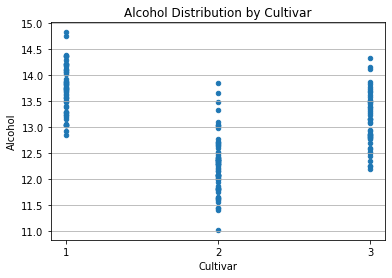

In [5]:
data.plot.scatter(x='Cultivar',y='Alcohol')
plt.xticks(np.arange(1,4,1))
plt.title('Alcohol Distribution by Cultivar')
plt.grid(True,axis='y')
plt.show()

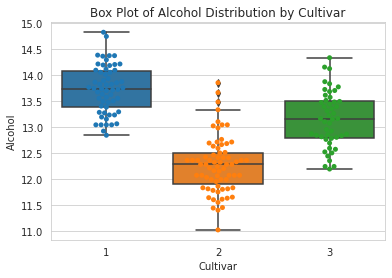

In [6]:
#we can use seaborn to identify outliers in our data
import seaborn as sb
sb.set_style('whitegrid')
sb.swarmplot(x='Cultivar',y='Alcohol',data=data)
sb.boxplot(x='Cultivar',y='Alcohol',data=data)
plt.title('Box Plot of Alcohol Distribution by Cultivar')
plt.show()
#based on this graph, we can tell that cultivar 2 has outliers on its upper end while cultivar 1 and 3 have no outliers

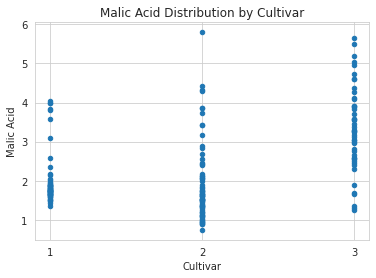

In [7]:
#based on our means, cultivar 3 also looks like it has much higher malic acid
data.plot.scatter(x='Cultivar',y='Malic_acid')
plt.xticks(np.arange(1,4,1))
plt.title('Malic Acid Distribution by Cultivar')
plt.ylabel('Malic Acid')
plt.grid(True,axis='y')
plt.show()
#however this scatter plot shows that the distribution of malic acid for cultivar 3 is similar to 2 but much more concentrated at a higher level

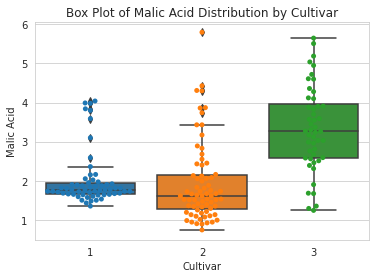

In [8]:
#again, using sb we can determine outliers
sb.set_style('whitegrid')
sb.swarmplot(x='Cultivar',y='Malic_acid',data=data)
sb.boxplot(x='Cultivar',y='Malic_acid',data=data)
plt.title('Box Plot of Malic Acid Distribution by Cultivar')
plt.ylabel('Malic Acid')
plt.show()
#both cultivar 1 and cultivar 2 have many outliers on the upper end

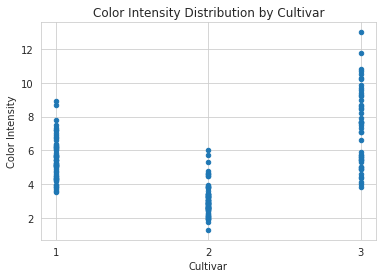

In [9]:
#color intensity also seems to have a huge discrepancy between the three cultivars
data.plot.scatter(x='Cultivar',y='Color_intensity')
plt.xticks(np.arange(1,4,1))
plt.title('Color Intensity Distribution by Cultivar')
plt.ylabel('Color Intensity')
plt.grid(True,axis='y')
plt.show()
#and as you can see, each cultivar has a relatively consistent concentration around its mean

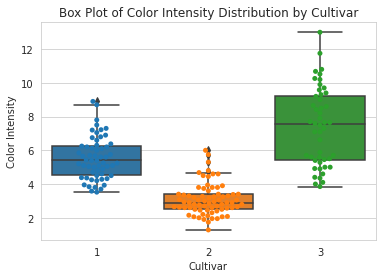

In [10]:
#finally, let's check out the outliers for color intensity
sb.set_style('whitegrid')
sb.swarmplot(x='Cultivar',y='Color_intensity',data=data)
sb.boxplot(x='Cultivar',y='Color_intensity',data=data)
plt.title('Box Plot of Color Intensity Distribution by Cultivar')
plt.ylabel('Color Intensity')
plt.show()
#seems like only cultivar 2 has several outliers in respect to color intensity

In [ ]:
#based on this analysis, cultivar 2 typically has more voltaile data (meaning it has more outliers)
#in order to truly determine this, we would have to perform the same analysis on all attributes
#but 3 attributes shows that there is a consistent trend

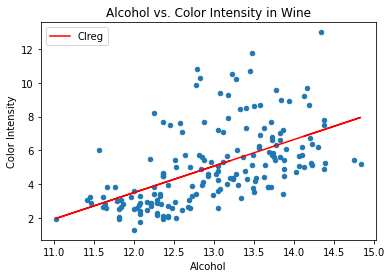

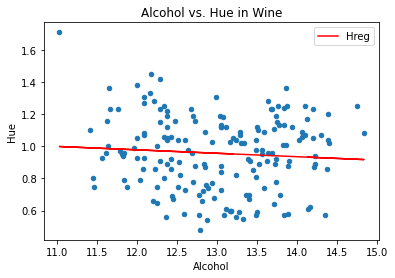

In [4]:
#next, I want to explore if alcohol content has a correlation with Color intensity or Hue
ax1=data.plot.scatter(x='Alcohol',y='Color_intensity')
plt.title('Alcohol vs. Color Intensity in Wine')
plt.ylabel('Color Intensity')

d = np.polyfit(data['Alcohol'],data['Color_intensity'],1)
f = np.poly1d(d)

data.insert(14,'CIreg',f(data['Alcohol']))

data.plot(x='Alcohol', y='CIreg',color='r',ax=ax1)

plt.show()

#there seems to be a faint negative linear relationship between alcohol content and color intensity but the r-squared must be extremely weak
ax2=data.plot.scatter(x='Alcohol',y='Hue')
plt.title('Alcohol vs. Hue in Wine')

d = np.polyfit(data['Alcohol'],data['Hue'],1)
f = np.poly1d(d)

data.insert(15,'Hreg',f(data['Alcohol']))

data.plot(x='Alcohol', y='Hreg',color='r',ax=ax2)

plt.show()

#and there seems to be little to no correlation between alcohol content and hue

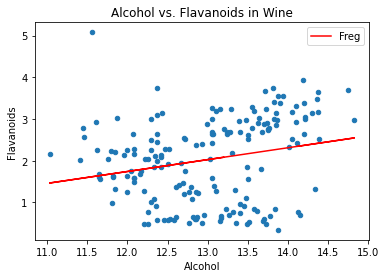

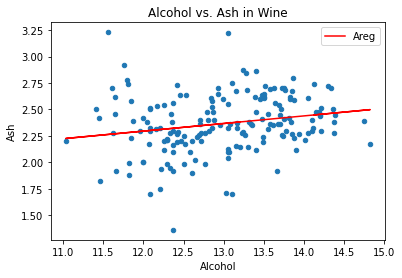

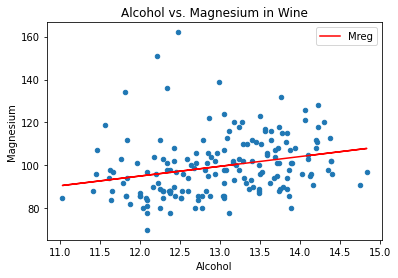

In [5]:
#I'm also curious to see what other correlations are related to alcohol content, specifically, flavanoids, ash and magnesium content
ax3=data.plot.scatter(x='Alcohol',y='Flavanoids')
plt.title('Alcohol vs. Flavanoids in Wine')
plt.grid(True)

d = np.polyfit(data['Alcohol'],data['Flavanoids'],1)
f = np.poly1d(d)

data.insert(16,'Freg',f(data['Alcohol']))

data.plot(x='Alcohol', y='Freg',color='r',ax=ax3)

plt.show()

ax4=data.plot.scatter(x='Alcohol',y='Ash')
plt.title('Alcohol vs. Ash in Wine')

d = np.polyfit(data['Alcohol'],data['Ash'],1)
f = np.poly1d(d)

data.insert(17,'Areg',f(data['Alcohol']))

data.plot(x='Alcohol', y='Areg',color='r',ax=ax4)

plt.show()

ax5=data.plot.scatter(x='Alcohol',y='Magnesium')
plt.title('Alcohol vs. Magnesium in Wine')

d = np.polyfit(data['Alcohol'],data['Magnesium'],1)
f = np.poly1d(d)

data.insert(18,'Mreg',f(data['Alcohol']))

data.plot(x='Alcohol', y='Mreg',color='r',ax=ax5)

plt.show()

#all three of these attributes seem to have little to no correlation with alcohol content

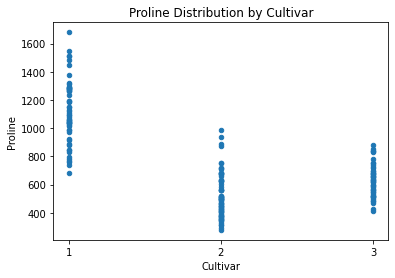

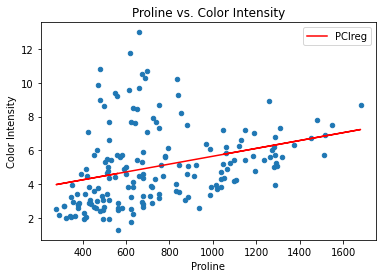

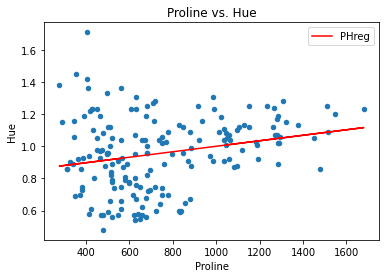

In [6]:
#finally, there seems to be a large discrepancy in proline among the three cultivars based on the mean data

data.plot.scatter(x='Cultivar',y='Proline')
plt.xticks(np.arange(1,4,1))
plt.title('Proline Distribution by Cultivar')

plt.show()

#the fact that there is a definitive discrepancy in proline between the three cultivars likely tells us that
#there were different grapes used in each cultivar process

#proline is a chemical that's used in the brewing process and determines opaqueness of the wine
#let's compare proline to color_intensity and hue
ax6=data.plot.scatter(x='Proline',y='Color_intensity')
plt.title('Proline vs. Color Intensity')
plt.ylabel('Color Intensity')

d = np.polyfit(data['Proline'],data['Color_intensity'],1)
f = np.poly1d(d)

data.insert(19,'PCIreg',f(data['Proline']))

data.plot(x='Proline', y='PCIreg',color='r',ax=ax6)

plt.show()

#we can see that as proline increases, the color intensity increases
#there is a valid correlation between the amount of proline in the wine and the end color of the wine

ax7=data.plot.scatter(x='Proline',y='Hue')
plt.title('Proline vs. Hue')

d = np.polyfit(data['Proline'],data['Hue'],1)
f = np.poly1d(d)

data.insert(20,'PHreg',f(data['Proline']))

data.plot(x='Proline', y='PHreg',color='r',ax=ax7)

plt.show()

#proline doesn't correlate with hue meaning the actual color of the wine is not affected by the chemical

#these results are in line with the purpose of proline and helps us determine that the data makes sense